### Complexes

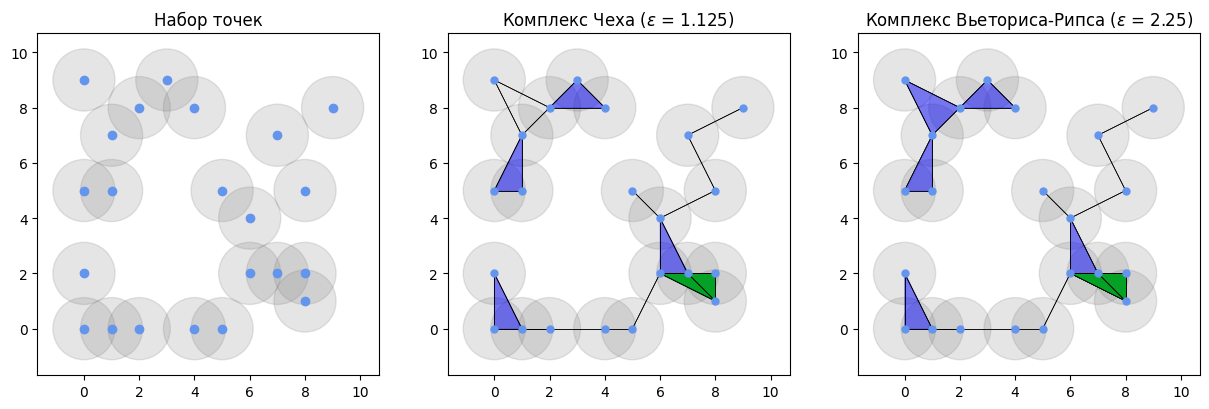

In [2]:
import numpy
import itertools
import matplotlib.pyplot as plt
import matplotlib.patches as ptchs

eps = 1.125
numpy.random.seed(6876)
homology_dimensions = [ 3, 4, 5, 2, 1 ]

points = numpy.random.randint(0, 10, (25, 2))
points = numpy.unique(points, axis = 0)
fig, axes = plt.subplots(1, 3, figsize = (15, 5))

def setup_axis(ax, points):
    ax.set_aspect('equal')
    for (x, y) in points:
        ax.add_patch(ptchs.Circle((x, y), eps, color = 'gray', alpha = 0.2))
    ax.scatter(points[:, 0], points[:, 1], alpha = 0)

def draw_simplex(ax, points):
    colors = [ None, 'cornflowerblue', 'black', (0, 0, 1, 0.1), (0, 0.75, 0, 0.1) ]
    color = colors[len(points)]
    if len(points) == 1:
        ax.scatter(points[0][0], points[0][1], 25, color = color)
    else:
        for pts in itertools.permutations(points):
            ax.add_patch(ptchs.Polygon(pts, color = color, linewidth = 0.5))


setup_axis(axes[0], points)
axes[0].set_title('Набор точек')
axes[0].scatter(points[:, 0], points[:, 1], color = 'cornflowerblue')


setup_axis(axes[1], points)
axes[1].set_title(f'Комплекс Чеха ($\epsilon$ = {eps})')
for dim in homology_dimensions:
    for pts in itertools.combinations(points, dim):
        pts = numpy.array(pts)
        xmin, xmax = numpy.min(pts[:, 0]), numpy.max(pts[:, 0])
        ymin, ymax = numpy.min(pts[:, 1]), numpy.max(pts[:, 1])
        if (xmax - xmin > 2 * eps) or (ymax - ymin > 2 * eps): continue
        x_range = numpy.arange(xmin - eps, xmax + eps, 0.01)
        y_range = numpy.arange(ymin - eps, ymax + eps, 0.01)
        for (c_x, c_y) in itertools.product(x_range, y_range):
            x_dist = (pts[:, 0] - c_x) ** 2
            y_dist = (pts[:, 1] - c_y) ** 2
            is_ok = (x_dist + y_dist) <= (eps ** 2)
            if (is_ok.all()):
                draw_simplex(axes[1], pts)
                break


setup_axis(axes[2], points)
axes[2].set_title(f'Комплекс Вьеториса-Рипса ($\epsilon$ = {2 * eps})')
for dim in homology_dimensions:
    for pts in itertools.combinations(points, dim):
        is_simplex = True
        for (x1, y1), (x2, y2) in itertools.product(pts, pts):
            dist = (x2 - x1) ** 2 + (y2 - y1) ** 2
            if dist > (2 * eps) ** 2:
                is_simplex = False
                break
        if is_simplex: draw_simplex(axes[2], pts)

fig.savefig(f"complexes/complexes.svg")
fig.savefig(f"complexes/complexes.png")

### Point clouds

In [3]:
import numpy
import gtda.plotting
import gtda.time_series

x = numpy.linspace(0, 50, 1000)
y = (numpy.cos(x) + numpy.sin(numpy.pi / 2 * x))

embedding = gtda.time_series.SingleTakensEmbedding(parameters_type="fixed", dimension = 3, time_delay = 16, stride = 3)
pc = embedding.fit_transform(y)
pc = pc @ numpy.array([
    [ numpy.cos(-numpy.pi / 2), -numpy.sin(-numpy.pi / 2), 0 ],
    [ numpy.sin(-numpy.pi / 2), numpy.cos(-numpy.pi / 2), 0 ],
    [ 0, 0, 1 ]
])

fig = gtda.plotting.plot_point_cloud(pc)
fig.update_layout(
    autosize = False,
    scene = {
        'xaxis': { 'nticks': 0, 'range': [ -3, 3 ] },
        'yaxis': { 'nticks': 0, 'range': [ -3, 3 ] },
        'zaxis': { 'nticks': 0, 'range': [ -3, 3 ] }
    }
)
display(fig)
fig.write_image(file = f"point_clouds/1.svg", format = "svg")

In [4]:
x = numpy.linspace(0, 50, 1000)
y = numpy.cosh(numpy.cos(numpy.pi / 2 * x) + numpy.sin(x))

pc = embedding.fit_transform(y)
alpha = numpy.pi
pc = pc @ numpy.array([
    [ numpy.cos(alpha), -numpy.sin(alpha), 0 ],
    [ numpy.sin(alpha), numpy.cos(alpha), 0 ],
    [ 0, 0, 1 ]
])

fig = gtda.plotting.plot_point_cloud(pc)

fig.update_layout(
    autosize = False,
    scene = {
        'xaxis': { 'nticks': 0, 'range': [ -4, -0.5 ] },
        'yaxis': { 'nticks': 0, 'range': [ -4, -0.5 ] },
        'zaxis': { 'nticks': 0, 'range': [ 0, 4.5 ] }
    },
    scene_camera = {
        'up': { 'x': 0, 'y': 0, 'z': 1 },
        'center': { 'x': 0, 'y': 0, 'z': 0 },
        'eye': { 'x': 1.5, 'y': 1.5, 'z': 0.5 }
    }
)

display(fig)
fig.write_image(file = f"point_clouds/2.svg", format = "svg")

### Features

#### Diagrams

In [22]:
import numpy
import gtda.diagrams
import gtda.plotting

diagrams = numpy.load("../Subj1/exp_final/overall_diagrams.npy")

diagram = gtda.plotting.plot_diagram(diagrams[23])
display(diagram)
diagram.write_image(file = f"features/diagram.svg", format = "svg")

In [29]:
life = (diagrams[:, :, 1] - diagrams[:, :, 0]).flatten()
life = life[life != 0]
eps = numpy.percentile(life, 60)
print(eps)

filtering = gtda.diagrams.Filtering(epsilon = eps)
filtered_diagrams = filtering.fit_transform(diagrams)

filtered_diagram = gtda.plotting.plot_diagram(filtered_diagrams[23])
display(filtered_diagram)
filtered_diagram.write_image(file = f"features/filtered_diagram.svg", format = "svg")

3.322810516692698e-06


#### Life & bd2

(186,)


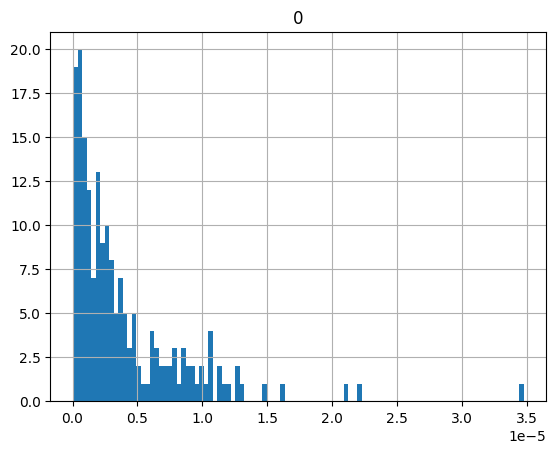

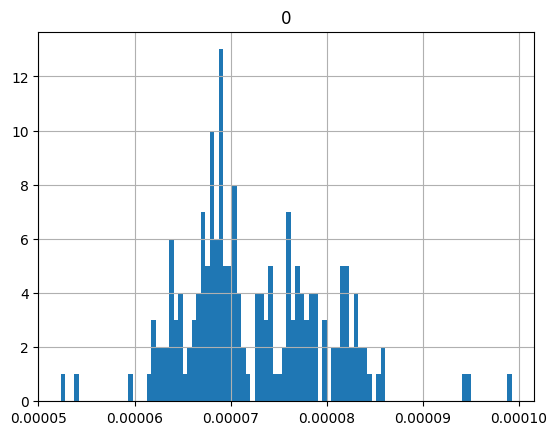

In [30]:
print_obj = 23
birth, death, dim = diagrams[print_obj, :, 0], diagrams[print_obj, :, 1], diagrams[print_obj, :, 2]
life = death - birth

birth, death, dim = birth[life > 0], death[life > 0], dim[life > 0]
bd2 = (birth + death) / 2.0
life = death - birth
print(life.shape)

import pandas
import matplotlib.pyplot as plt

life_hist = pandas.DataFrame(life.reshape(-1, 1)).hist(bins = 100)
plt.savefig("features/life.svg")

bd2_hist = pandas.DataFrame(bd2.reshape(-1, 1)).hist(bins = 100)
plt.savefig("features/bd2.svg")

#### Betti

In [81]:
import gtda.curves
import gtda.diagrams
import gtda.plotting

betti = gtda.diagrams.BettiCurve()
betti_curves = betti.fit_transform(diagrams)
betti_fig = betti.plot(betti_curves, sample = 787)
betti_fig.update_layout(width = 1000, height = 1000)
display(betti_fig)
betti_fig.write_image(file = f"features/betti.svg", format = "svg")

In [80]:
derivative = gtda.curves.Derivative()
betti_der = derivative.fit_transform(betti_curves)
betti_der_fig = betti.plot(betti_der, sample = 787)
betti_der_fig.update_layout(width = 1000, height = 1000)
display(betti_der_fig)
betti_der_fig.write_image(file = f"features/betti_der.svg", format = "svg")

#### Landscape

In [82]:
import gtda.curves
import gtda.diagrams
import gtda.plotting

landscape = gtda.diagrams.PersistenceLandscape(n_layers = 3)
landscapes = landscape.fit_transform(diagrams)
landscape_fig = landscape.plot(landscapes, sample = 787)
landscape_fig.update_layout(width = 1000, height = 1000)
display(landscape_fig)
landscape_fig.write_image(file = f"features/landscape.svg", format = "svg")

#### Silhouette

In [83]:
import gtda.curves
import gtda.diagrams
import gtda.plotting

silhouette = gtda.diagrams.Silhouette(power = 1)
silhouettes = silhouette.fit_transform(diagrams)
silhouette_fig = silhouette.plot(silhouettes, sample = 794)
silhouette_fig.update_layout(width = 1000, height = 1000)
display(silhouette_fig)
silhouette_fig.write_image(file = f"features/silhouette.svg", format = "svg")

### IV

In [1]:
import pandas
import matplotlib.pyplot as plt

In [2]:
def sourceFilter(row):
    if row['Source'].startswith('dissim'):
        return 'dissim'
    return row['Source']

def process_iv(subj: str):
    IV = pandas.read_csv(f"../{subj}/exp_final/IV.csv").drop(columns = [ 'Unnamed: 0' ])
    IV[["Source", "Algorithm", "Dimension", "Stat"]] = IV['Feature'].str.split(' ', expand = True)
    IV["SourceFilt"] = IV.apply(sourceFilter, axis = 1)
    IV = IV.sort_values(by = 'internal', ascending = False)
    return IV

In [3]:
def SourceFiltRenamer(initial: str) -> str:
    if initial == 'dissim':
        return 'Анализ корелляций'
    if initial == 'overall':
        return 'Анализ ЭЭГ в целом'
    ind = initial.find('-') + 1
    return f'Компонента {initial[ind:]}'

def AlgorithmRenamer(row):
    return {
        'amplitude-betti-1':        'Амп. по кр. Бетти с p=1',
        'amplitude-betti-2':        'Амп. по кр. Бетти с p=2',

        'amplitude-bottleneck':     'Амп. по р. узкого горлышка',
        'amplitude-wasserstein-1':  'Амп. по р. Васерштейна с p=1',
        'amplitude-wasserstein-2':  'Амп. по р. Васерштейна с p=2',
        
        'amplitude-landscape-1-1':  'Амп. по ланд. уст. 1 ур. с p=1',
        'amplitude-landscape-1-2':  'Амп. по ланд. уст. 2 уровня с p=1',
        'amplitude-landscape-2-1':  'Амп. по ланд. уст. 1 уровня с p=2',
        'amplitude-landscape-2-2':  'Амп. по ланд. уст. 2 уровня с p=2',
        
        'amplitude-silhouette-1-1': 'Амп. по сил. уст. 1 степени с p=1',
        'amplitude-silhouette-1-2': 'Амп. по сил. уст. 2 степени с p=1',
        'amplitude-silhouette-2-1': 'Амп. по сил. уст. 1 степени с p=2',
        'amplitude-silhouette-2-2': 'Амп. по сил. уст. 2 степени с p=2',

        'bd2':                      'Стат. хар. ср. (b + d) / 2',
        'life':                     'Стат. хар. ср. (d - b)',
        'betti':                    'Стат. хар.. кривых Бетти',
        'landscape':                'Стат. хар. 1 ур. ландшафта уст.',
        'silhouette-1':             'Стат. хар. силуэта уст. 1 ст.',
        'silhouette-2':             'Стат. хар. силуэта уст. 2 ст.',
        
        'entropy':                  'Энтропия устойчивости',
        'numberofpoints':           'Количество точек на диаграмме',
    }[row]

def DimensionRenamer(row):
    return {
        'all':        'Все',
        'dim-1':      'Изм. 1',
        'dim-2':      'Изм. 2',
        'dim-3':      'Изм. 3',
        'dim-4':      'Изм. 4',
        'dim-5':      'Изм. 5',
        'norm-1':     'Норма амп. p=1',
        'norm-2':     'Норма амп. p=2'
    }[row]

def StatRenamer(row):
    return {
        'kurtosis':    'Ассиметрия',
        'skew':    'Эксцесс',
        'max':    'Максимум',
        'mean':    'Среднее значение',
        'median':    'Медиана',
        'norm-1':    'Норма с p=1',
        'norm-2':    'Норма с p=2',
        'percentile-25':    'Перцентиль - 25',
        'percentile-75':    'Перцентиль - 75',
        'std':    'Стандартное отклонение',
        'sum':    'Сумма',
    }[row]

In [4]:
def draw(IV, group_by, sort_by, ax, renamer, title):
    stats = IV.groupby(by = group_by).mean(numeric_only = True)
    stats = stats.sort_values(by = sort_by).reset_index()
    stats[group_by] = stats[group_by].apply(renamer)
    stats.plot.bar(x = group_by, y = sort_by, ax = ax)
    ax.set_title(title)
    ax.get_legend().remove()
    ax.xaxis.set_label_text('')

def analyze(subj, result):
    IV = process_iv(subj)
    fig, axes = plt.subplots(2, 2, figsize = (30, 10))
    fig.show(False)

    draw(IV, 'SourceFilt', result, axes.flat[0], SourceFiltRenamer, 'По стратегии извлечения')
    draw(IV, 'Algorithm', result, axes.flat[1], AlgorithmRenamer, 'По типу')
    draw(IV, 'Dimension', result, axes.flat[2], DimensionRenamer, 'По измерению симплексов')
    draw(IV, 'Stat', result, axes.flat[3], StatRenamer, 'По стат. характеристике')

    fig.tight_layout(h_pad = 3)
    fig.savefig(f"../{subj}/exp_final/{result}/feature_agg.svg")
    fig.savefig(f"../{subj}/exp_final/{result}/feature_agg.png")

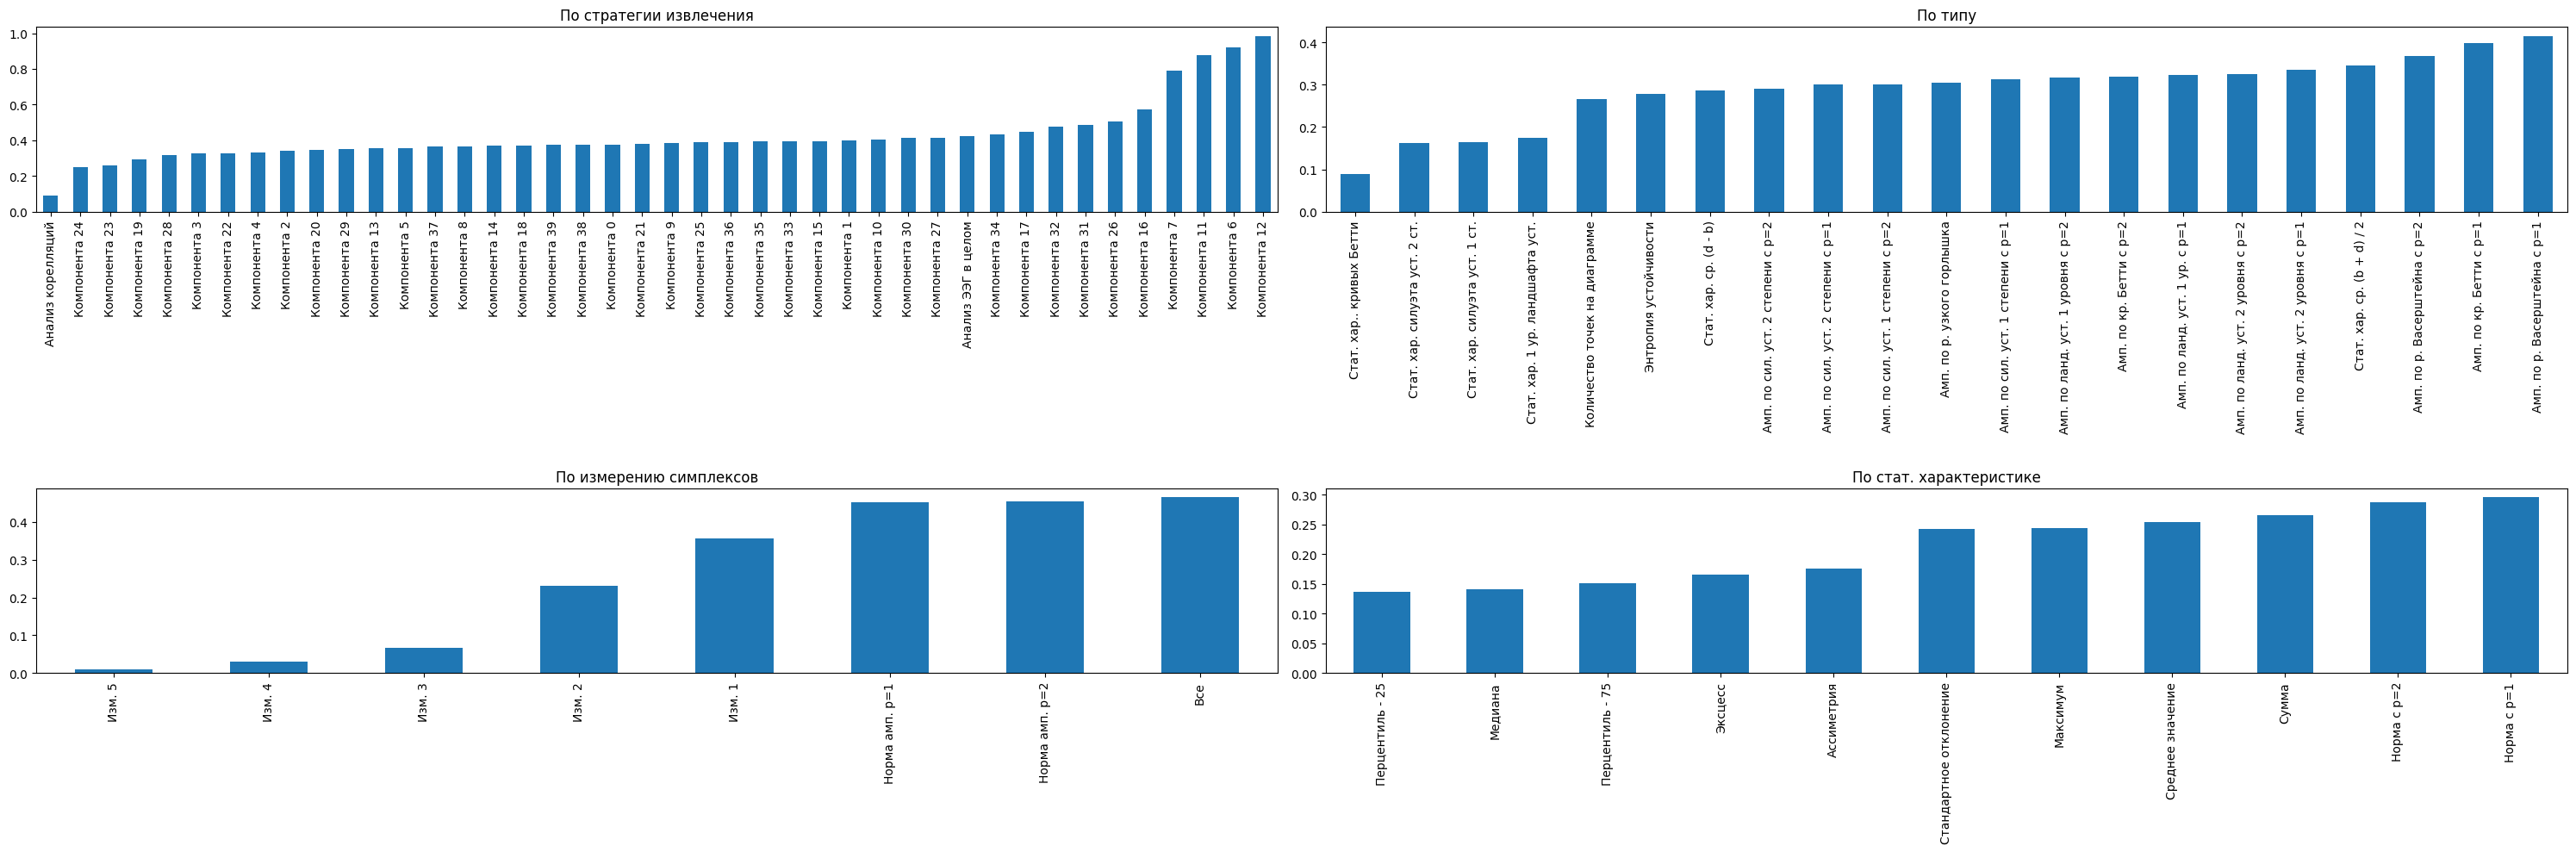

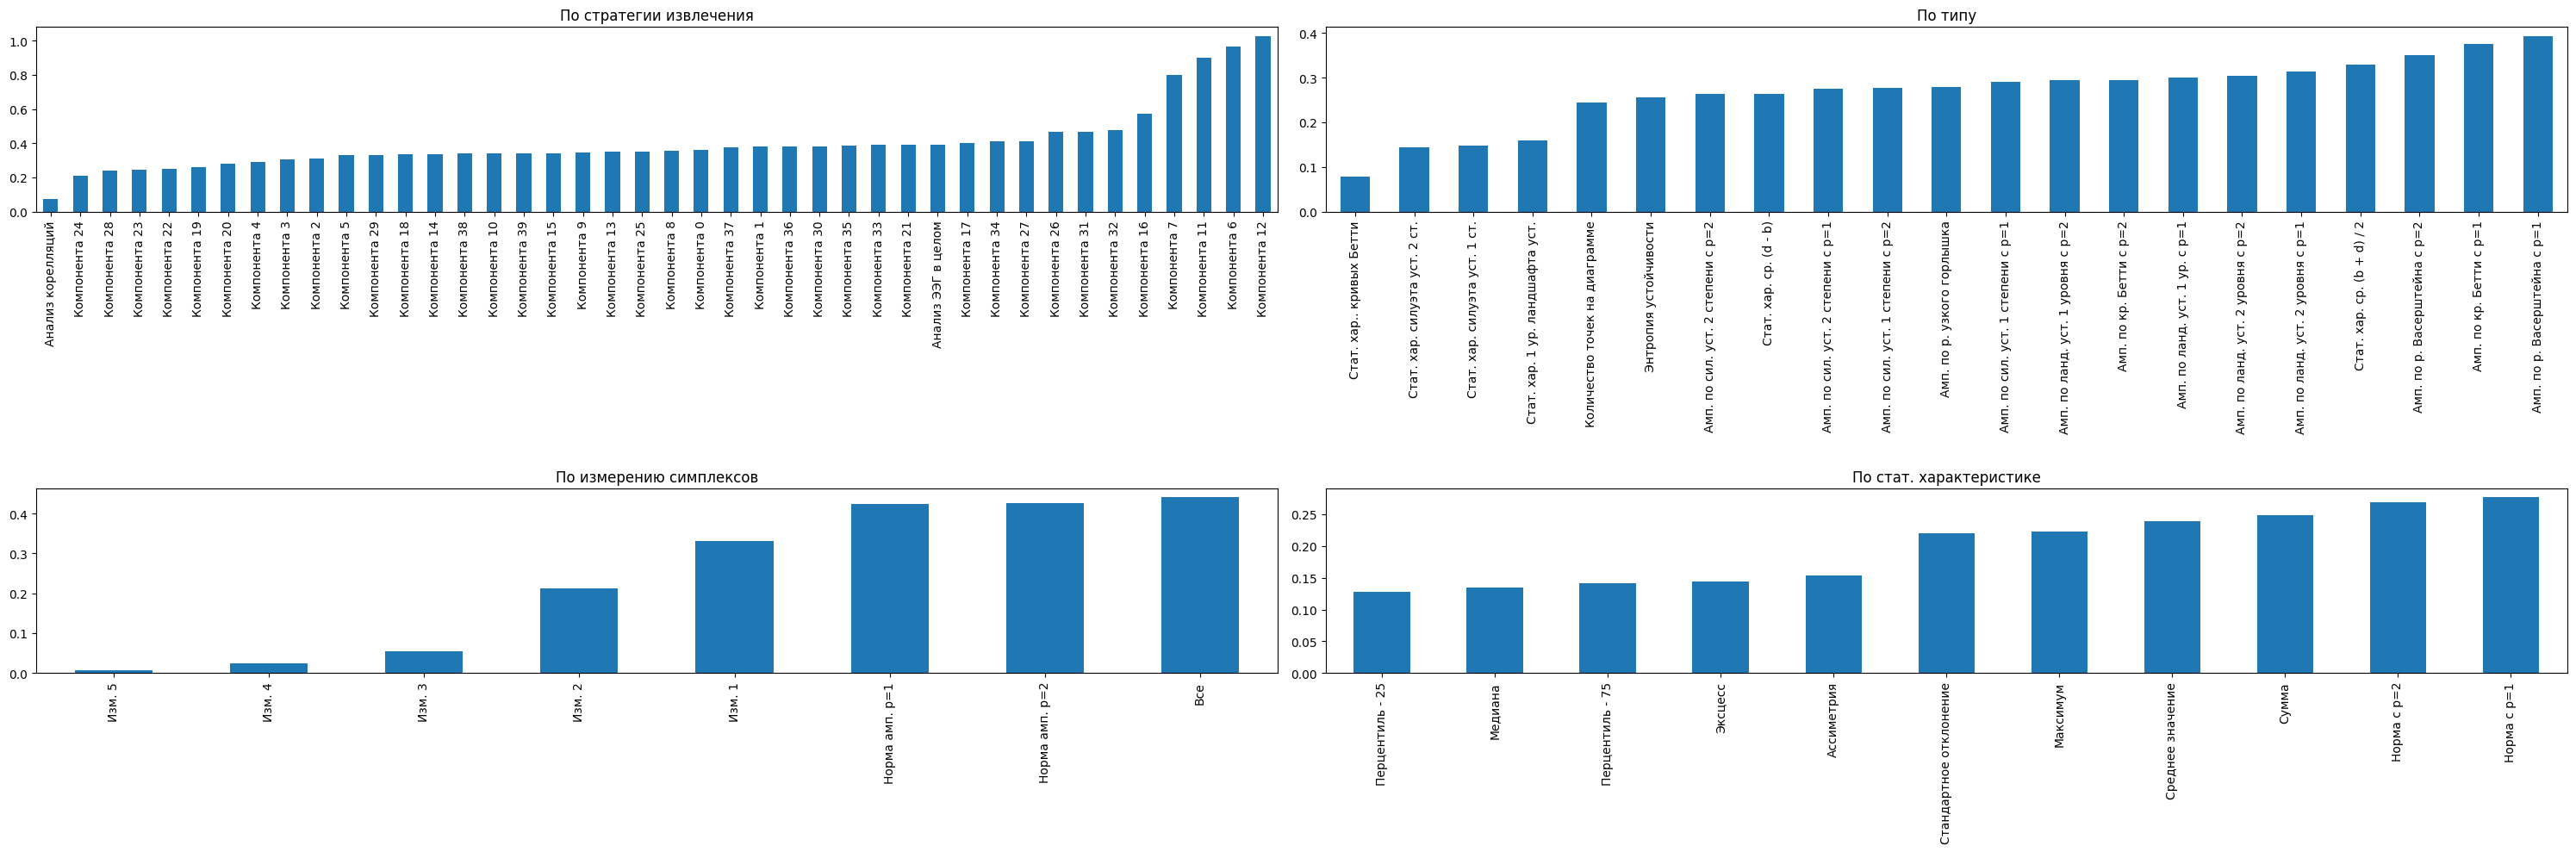

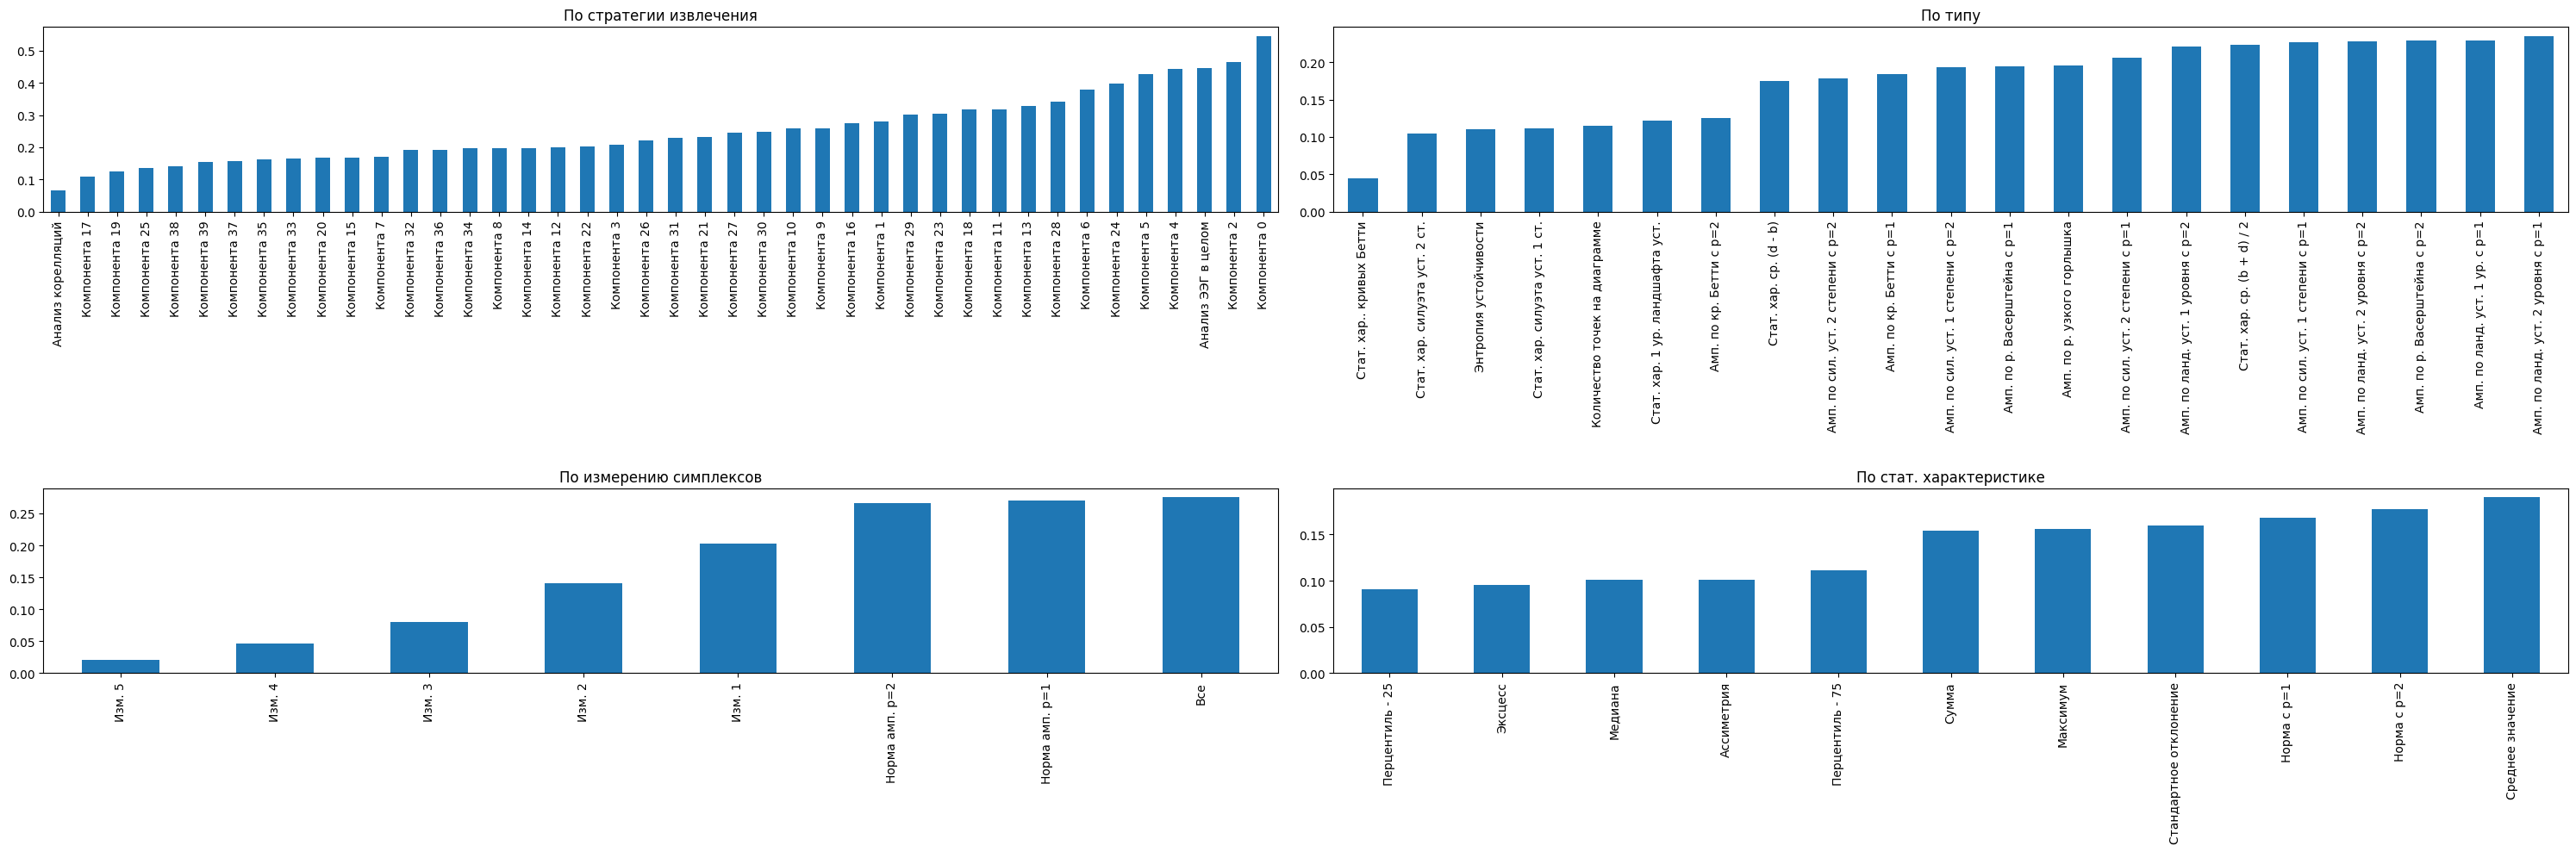

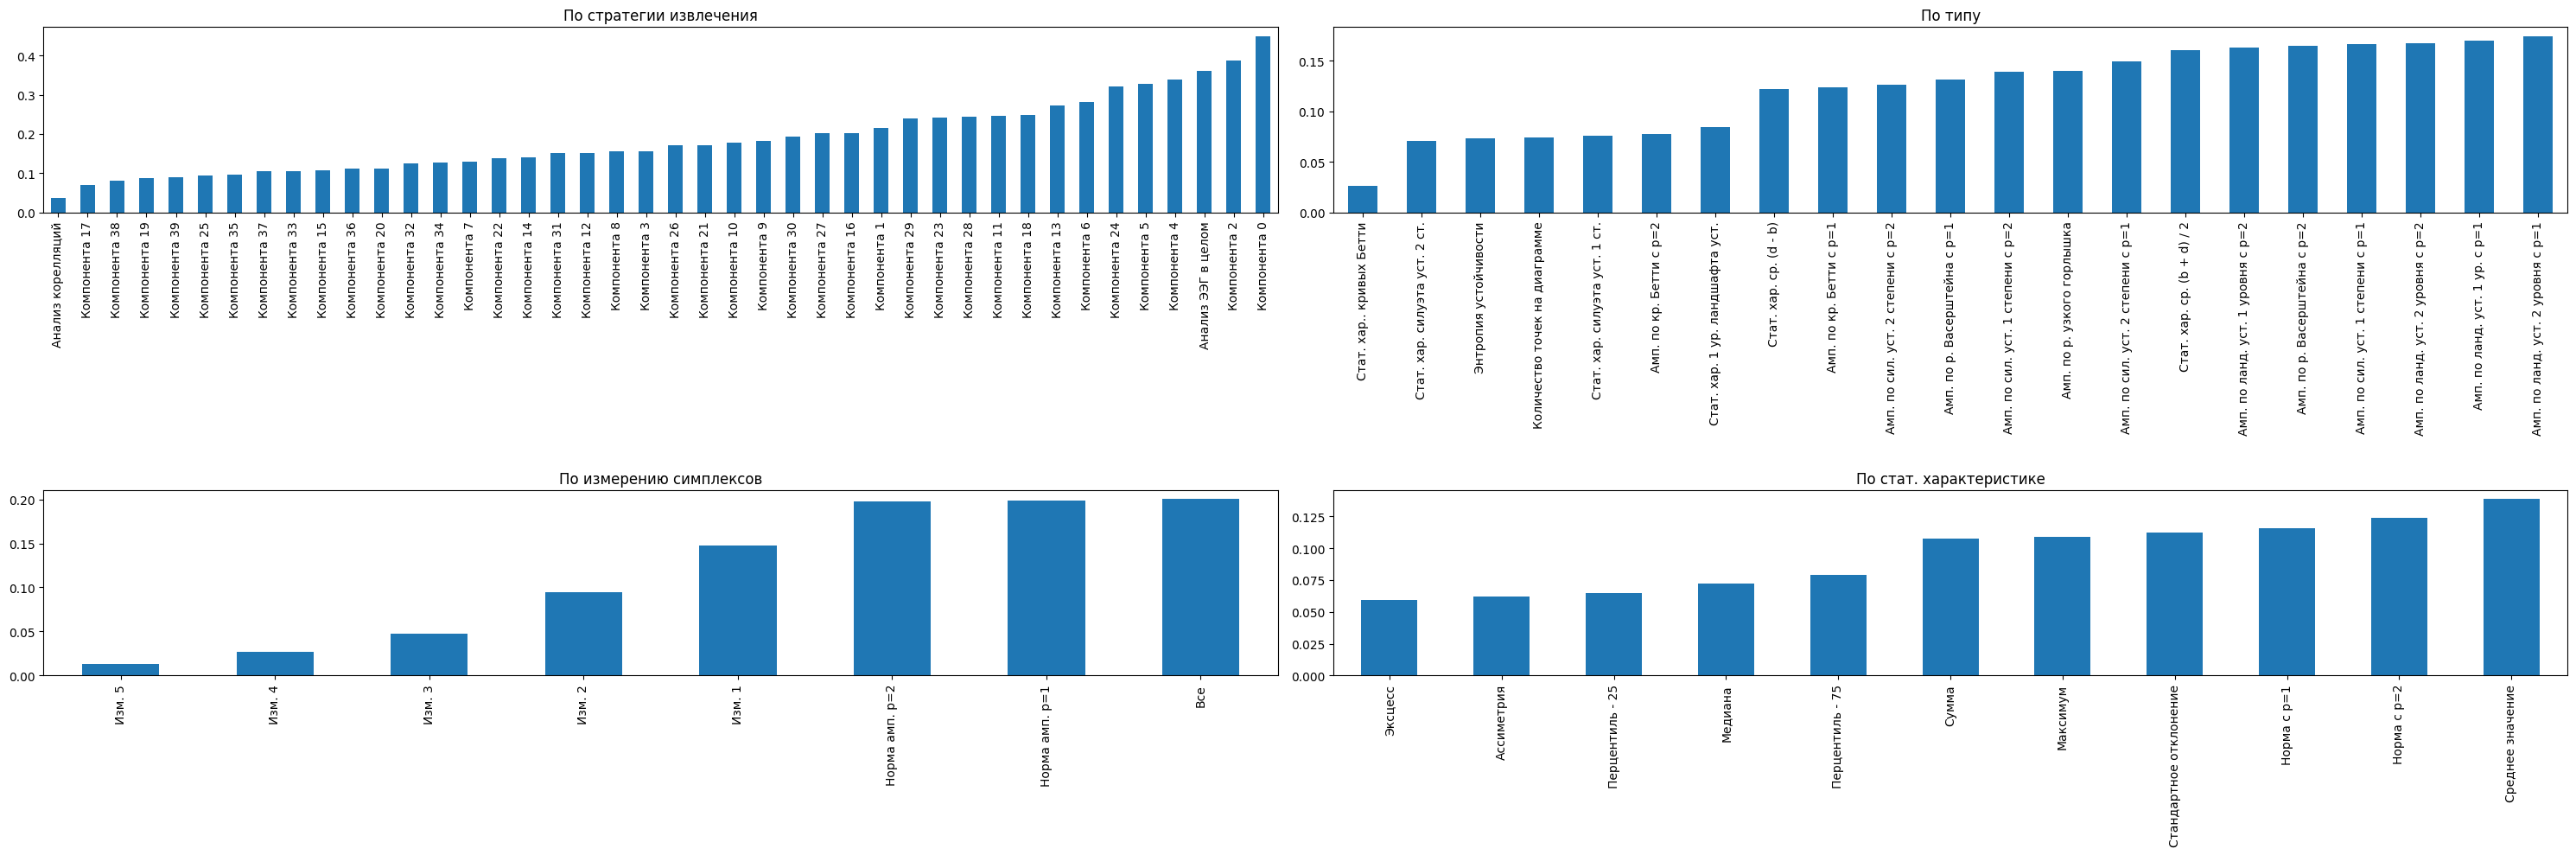

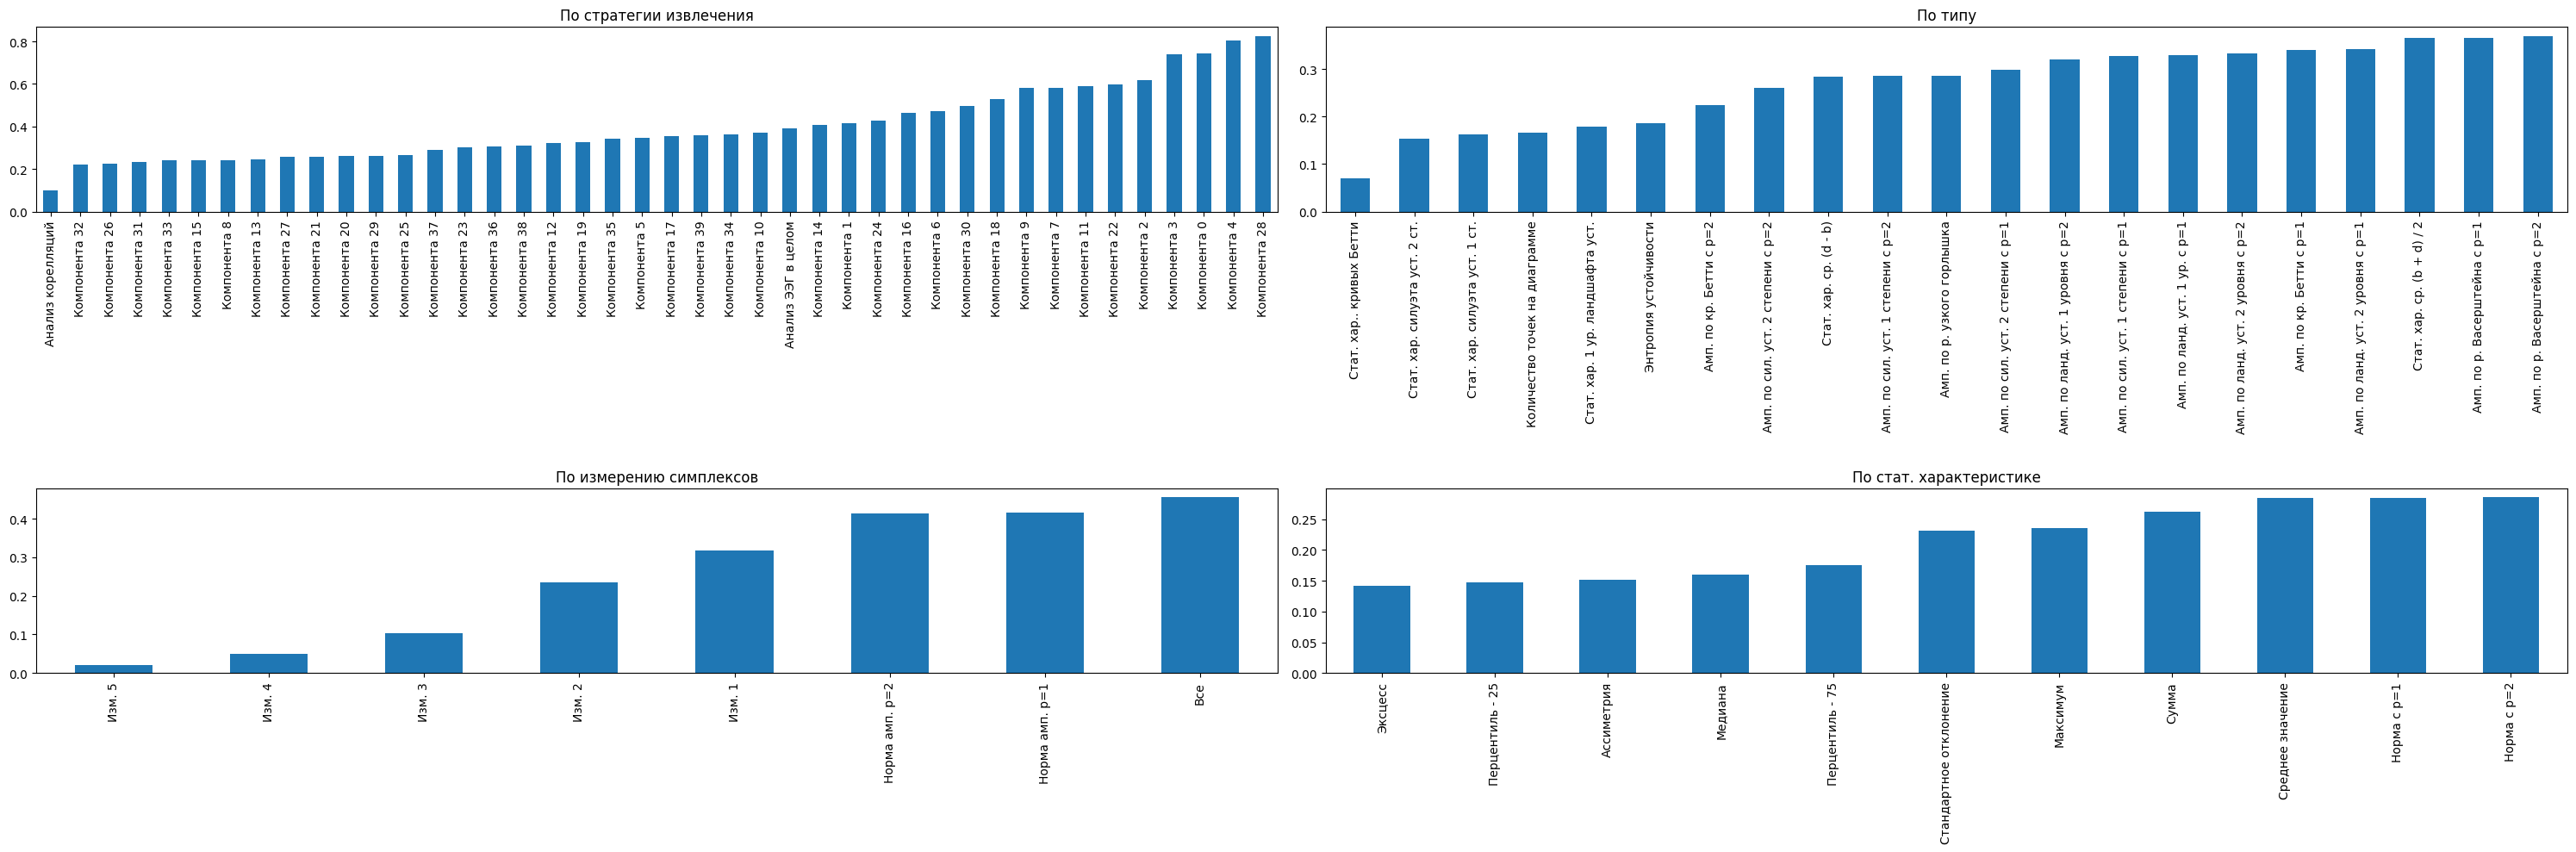

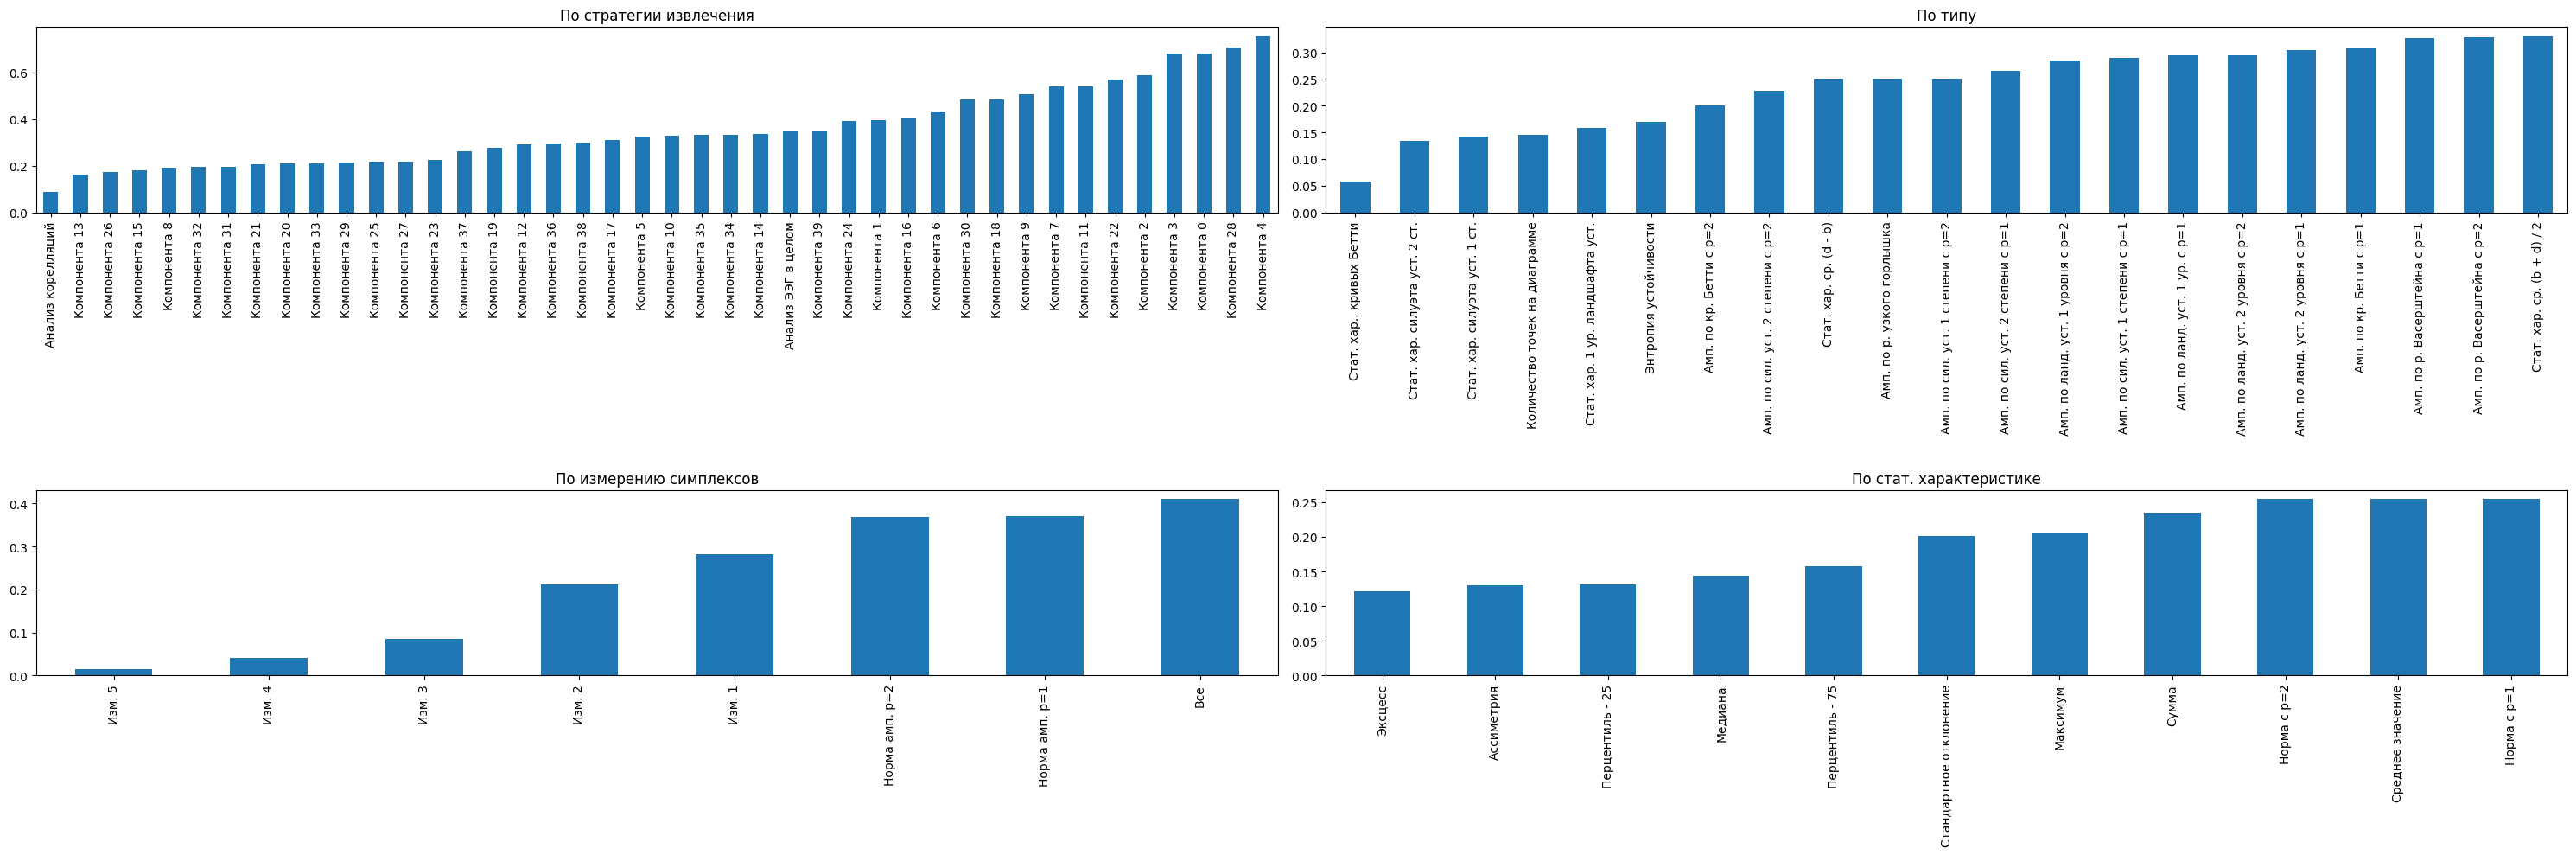

In [5]:
analyze('Subj1', 'internal')
analyze('Subj1', 'external')

analyze('Subj2', 'internal')
analyze('Subj2', 'external')

analyze('Subj3', 'internal')
analyze('Subj3', 'external')

### Sensors

Reading d:\HSE\year-3\HSE\CourseProject\report\..\Subj3\src\epochs_filt_rr-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
1180 matching events found
No baseline correction applied
0 projection items activated


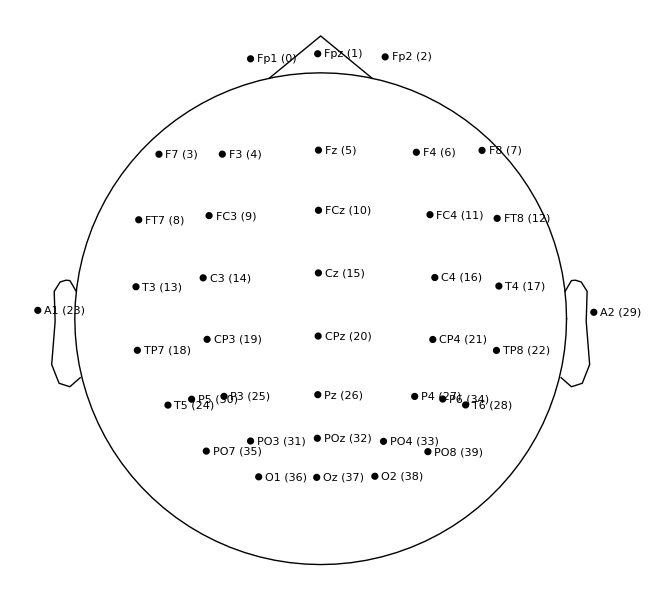

In [91]:
import mne
epochs = mne.read_epochs(f"../Subj3/src/epochs_filt_rr-epo.fif")
epochs.rename_channels({ name: f'{name} ({i})' for i, name in enumerate(epochs.ch_names) })

import matplotlib
matplotlib.rcParams.update({'font.size': 8})
fig = mne.viz.plot_sensors(epochs.info, 'topomap', show_names = True, pointsize = 10)
fig.savefig(f"regions/regions.svg")
fig.savefig(f"regions/regions.png")